In [7]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("data.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Total_cases,Daily_cases,3_day _moving_average_cases,7_day_moving_average_cases,Currently_Infected,Total_Deaths,Daily_Deaths,3_day_moving_average_deaths,3_day_moving_average_deaths.1
Date,,,,,,,,,
2020-02-15,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2020-02-16,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2020-02-17,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2020-02-18,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2020-02-19,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN


Looking good! Let's get some more info.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605 entries, 2020-02-15 to 2021-10-11
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total_cases                    605 non-null    int64  
 1   Daily_cases                    587 non-null    float64
 2   3_day _moving_average_cases    586 non-null    float64
 3   7_day_moving_average_cases     584 non-null    float64
 4   Currently_Infected             605 non-null    int64  
 5   Total_Deaths                   605 non-null    int64  
 6   Daily_Deaths                   587 non-null    float64
 7   3_day_moving_average_deaths    576 non-null    float64
 8   3_day_moving_average_deaths.1  574 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 47.3 KB


Because we told pandas to parse the date column and set it as the index, its not in the list of columns.

You can also see there isn't many samples.

In [9]:
# How many samples do we have?
len(df)

605

We've collected the data of Coronavirus cases for the past ~2 years and there're  605 total samples.

This is something you'll run into with time series data problems. Often, the number of samples isn't as large as other kinds of data.

For example, collecting one sample at different time frames results in:

Deep learning algorithms usually flourish with lots of data, in the range of thousands to millions of samples.

In [10]:
# Only want closing price for each day 
crown = pd.DataFrame(df["Daily_cases"]).rename(columns={"Daily_cases": "daily"})
crown.head()

,daily
Date,
2020-02-15,NaN
2020-02-16,NaN
2020-02-17,NaN
2020-02-18,NaN
2020-02-19,NaN


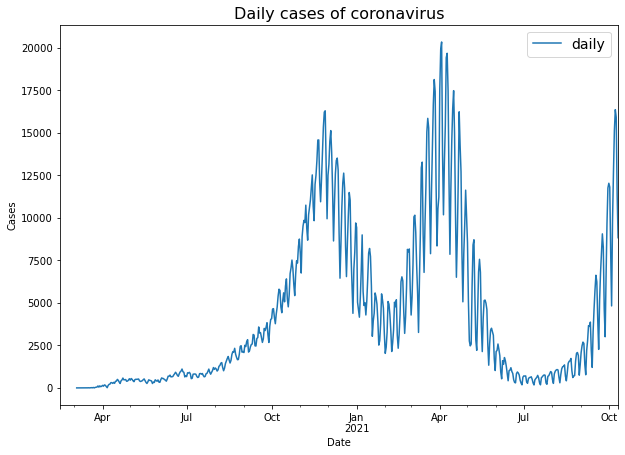

In [11]:
import matplotlib.pyplot as plt
crown.plot(figsize=(10, 7))
plt.ylabel("Cases")
plt.title("Daily cases of coronavirus", fontsize=16)
plt.legend(fontsize=14);

If your time series data comes in CSV form you don't necessarily have to use pandas.

You can use Python's in-built csv module. And if you're working with dates, you might also want to use Python's datetime.

Let's see how we can replicate the plot we created before except this time using Python's csv and datetime modules.

In [12]:
# Importing and formatting data with Python
import csv
from datetime import datetime

timesteps = []
daily_cases = []
with open("./data.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%m/%d/%Y")) # get the dates as dates (not strings), strptime = string parse time
    daily_cases.append(int(line[1])) # get the daily cases as int

# View first 20 of each
timesteps[:-20], daily_cases[:-20]

([datetime.datetime(2020, 2, 15, 0, 0),
  datetime.datetime(2020, 2, 16, 0, 0),
  datetime.datetime(2020, 2, 17, 0, 0),
  datetime.datetime(2020, 2, 18, 0, 0),
  datetime.datetime(2020, 2, 19, 0, 0),
  datetime.datetime(2020, 2, 20, 0, 0),
  datetime.datetime(2020, 2, 21, 0, 0),
  datetime.datetime(2020, 2, 22, 0, 0),
  datetime.datetime(2020, 2, 23, 0, 0),
  datetime.datetime(2020, 2, 24, 0, 0),
  datetime.datetime(2020, 2, 25, 0, 0),
  datetime.datetime(2020, 2, 26, 0, 0),
  datetime.datetime(2020, 2, 27, 0, 0),
  datetime.datetime(2020, 2, 28, 0, 0),
  datetime.datetime(2020, 2, 29, 0, 0),
  datetime.datetime(2020, 3, 1, 0, 0),
  datetime.datetime(2020, 3, 2, 0, 0),
  datetime.datetime(2020, 3, 3, 0, 0),
  datetime.datetime(2020, 3, 4, 0, 0),
  datetime.datetime(2020, 3, 5, 0, 0),
  datetime.datetime(2020, 3, 6, 0, 0),
  datetime.datetime(2020, 3, 7, 0, 0),
  datetime.datetime(2020, 3, 8, 0, 0),
  datetime.datetime(2020, 3, 9, 0, 0),
  datetime.datetime(2020, 3, 10, 0, 0),
  datetim

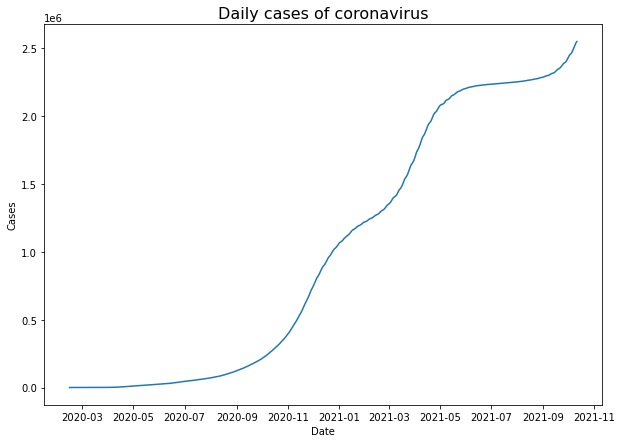

In [13]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, daily_cases)
plt.title("Daily cases of coronavirus", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cases");


In [14]:
crown.describe

<bound method NDFrame.describe of               daily
Date               
2020-02-15      NaN
2020-02-16      NaN
2020-02-17      NaN
2020-02-18      NaN
2020-02-19      NaN
...             ...
2021-10-07  15125.0
2021-10-08  16362.0
2021-10-09  15908.0
2021-10-10  11344.0
2021-10-11   8832.0

[605 rows x 1 columns]>

<h2>Create train & test sets for time series</h2>

In [15]:
# Get bitcoin date array
timesteps = crown.index.to_numpy()
prices = crown.to_numpy()


In [16]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(daily_cases)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], daily_cases[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], daily_cases[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(484, 121, 484, 121)

Okay, looks like our custom made splits are the same lengths as the splits we made with train_test_split.

But again, these are numbers on a page.

And you know how the saying goes, trust one eye more than two ears.

Let's visualize.

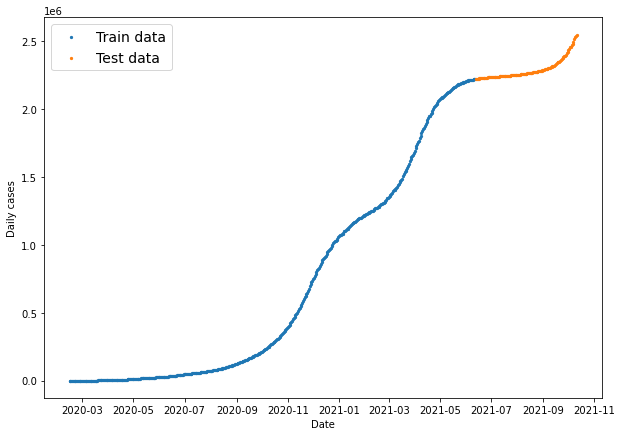

In [17]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Daily cases")
plt.legend(fontsize=14)
plt.show();

We're going to be using the training set (past) to train a model to try and predict values on the test set (future).

Because the test set is an artificial future, we can guage how our model might perform on actual future data.

<h2>Create a plotting function</h2>

In [18]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Daile cases")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

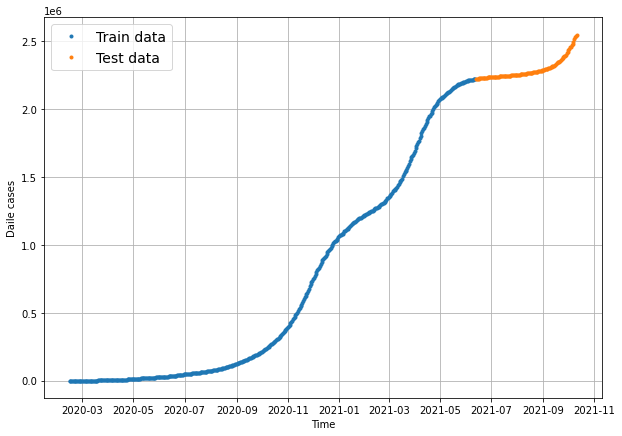

In [19]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

<h2>Modelling Experiments</h2>

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we can build almost any kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

horizon = number of timesteps to predict into future
window = number of timesteps from past used to predict horizon

<h2>Model 0: Naïve forecast (baseline)</h2>

In [20]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:100], naive_forecast[-100:] # View frist 10 and last 10

([2223558,
  2223978,
  2224992,
  2226037,
  2227225,
  2228192,
  2229044,
  2229523,
  2229846,
  2230142,
  2230977,
  2231914,
  2232790,
  2233546,
  2233996,
  2234281,
  2234463,
  2235096,
  2235801,
  2236497,
  2237202,
  2237553,
  2237823,
  2238364,
  2238974,
  2239591,
  2240246,
  2240753,
  2241043,
  2241217,
  2241698,
  2242245,
  2242868,
  2243605,
  2244196,
  2244495,
  2244677,
  2245275,
  2245930,
  2246656,
  2247419,
  2248164,
  2248450,
  2248663,
  2249344,
  2250061,
  2250907,
  2251869,
  2252785,
  2253269,
  2253534,
  2254361,
  2255345,
  2256397,
  2257478,
  2258532,
  2259151,
  2259451,
  2260232,
  2261354,
  2262601,
  2263864,
  2265217,
  2265912,
  2266329,
  2267219,
  2268666,
  2270226,
  2271826,
  2273558,
  2274561,
  2275171,
  2275863,
  2276590,
  2278171,
  2280203,
  2282285,
  2284191,
  2284940,
  2286296,
  2288371,
  2290848,
  2293541,
  2296155,
  2297534,
  2298307,
  2300504,
  2303276,
  2306939,
  2310554,
  2314423,

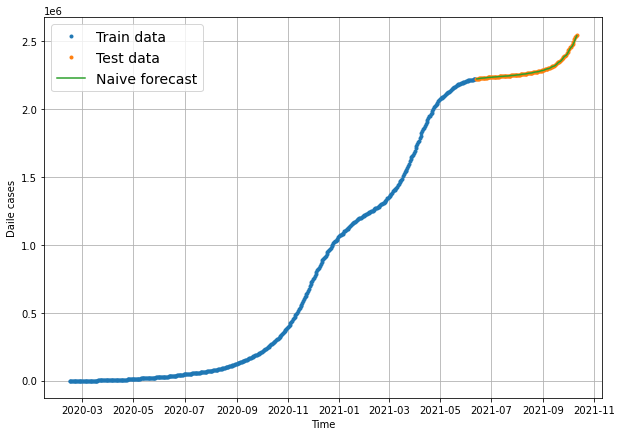

In [21]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the start parameter of our plot_time_series() function.

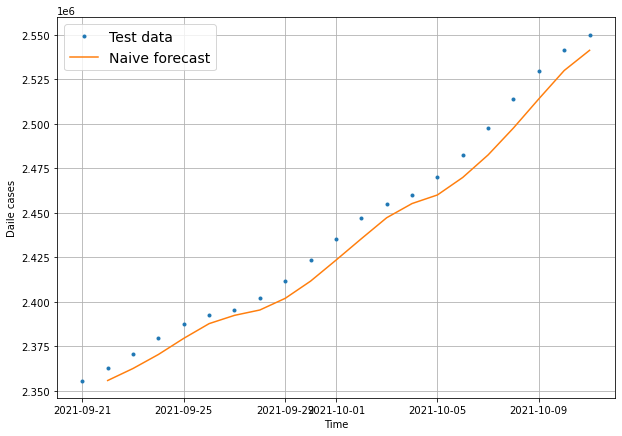

In [22]:
plt.figure(figsize=(10, 7))
offset = 100 # offset the values by 100 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


When we zoom in we see the naïve forecast comes slightly after the test data. This makes sense because the naive forecast uses the previous timestep value to predict the next timestep value.

Forecast made. Time to evaluate it.

<h2> Model 5: RNN (LSTM)</h2>

Once again, one of the most important steps for the LSTM model will be getting our data into the right shape.

The tf.keras.layers.LSTM() layer takes a tensor with [batch, timesteps, feature] dimensions.

As mentioned earlier, the batch dimension gets taken care of for us but our data is currently only has the feature dimension (WINDOW_SIZE).

In [23]:
import tensorflow as tf
import os
from tensorflow.keras import layers


HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data


## Some defs

In [24]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [25]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [26]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  window_indexes=window_indexes
  print(f"Window indexes:\n {window_indexes[:1], window_indexes[-1:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [28]:
# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [29]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [30]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [31]:
WINDOW_SIZE, HORIZON

(7, 1)

In [32]:
daily_cases = np.array(daily_cases).astype('float32')

In [33]:
# Create windowed dataset
full_windows, full_labels = make_windows(daily_cases, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7]]), array([[597, 598, 599, 600, 601, 602, 603, 604]]), (598, 8))


(598, 598)

In [34]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(478, 120, 478, 120)

In [35]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [36]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [37]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [38]:
import tensorflow as tf

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


In [39]:

# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

4/4 [==============================] - 1s 4ms/step - loss: 10062.6836


10062.68359375

In [40]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2219322.5, 2220556. , 2221645. , 2222735.8, 2223714.5, 2224664.5,
       2225620. , 2226487.2, 2227276.5, 2227936.5], dtype=float32)>

In [41]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 10062.691,
 'mse': 234885390.0,
 'rmse': 15325.971,
 'mape': 0.42328382,
 'mase': 3.6719408}

In [42]:
X_train

array(['2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18T00:00:00.000000000',
       '2020-02-19T00:00:00.000000000', '2020-02-20T00:00:00.000000000',
       '2020-02-21T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
       '2020-02-23T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
       '2020-02-25T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
       '2020-02-27T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-12T00:00:00.000000000', '2020-03-13

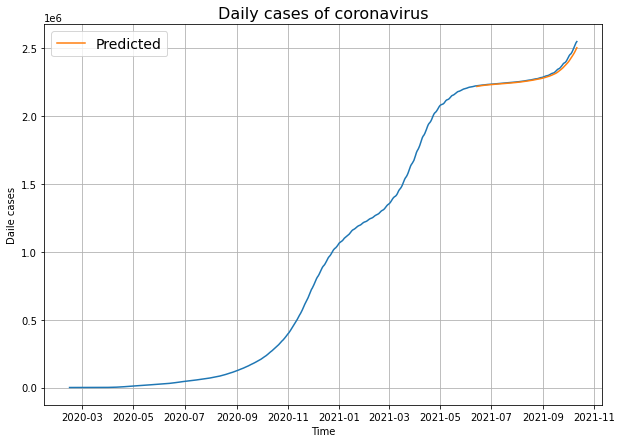

In [45]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, daily_cases)
plt.title("Daily cases of coronavirus", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cases");
plot_time_series(timesteps=X_test[1:], values=model_5_preds, format="-", label="Predicted");